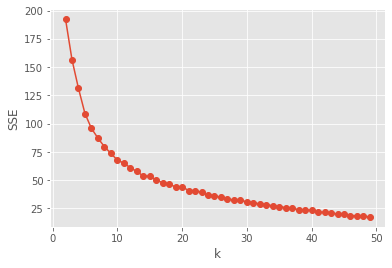

Volkswagen 产品的所有相关类如下：
[7, 2, 6, 0]
Volkswagen和竞争对手的品牌，产品数量如下：
CarName
Nissan         1
audi           4
bmw            1
buick          4
chevrolet      2
dodge          2
honda          9
isuzu          1
maxda          2
mazda          5
mitsubishi     5
nissan         8
peugeot        5
plymouth       1
renault        1
saab           2
subaru         5
toyota        11
vokswagen      1
volkswagen     9
volvo          1
vw             2
Name: CarName, dtype: int64


In [308]:
'''
聚类分析是常用的数据分析方法之一，不仅可以帮助我们对用户进行分组，还可以帮我们对产品进行分组（比如竞品分析）
数据源：https://www.kaggle.com/goyalshalini93/car-data
数据包括了205款车的26个字段
现在请你对该汽车数据进行聚类分析，并找到vokswagen汽车的相应竞品
'''
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

def car_cluster ( ):
    # 导入数据
    df = pd.read_csv ( 'CarPrice_Assignment.csv' )
    # 去除无关数据
    tran_x = df.iloc[:, 3:26]
    # print(train_x)
    # 将文本标签通过LabelEncoder来规范化
    tran_x['fueltype'] = LabelEncoder ( ).fit_transform ( tran_x['fueltype'] )
    tran_x['aspiration'] = LabelEncoder ( ).fit_transform ( tran_x['aspiration'] )
    tran_x['doornumber'] = LabelEncoder ( ).fit_transform ( tran_x['doornumber'] )
    tran_x['carbody'] = LabelEncoder ( ).fit_transform ( tran_x['carbody'] )
    tran_x['drivewheel'] = LabelEncoder ( ).fit_transform ( tran_x['drivewheel'] )
    tran_x['enginelocation'] = LabelEncoder ( ).fit_transform ( tran_x['enginelocation'] )
    tran_x['enginetype'] = LabelEncoder ( ).fit_transform ( tran_x['enginetype'] )
    tran_x['cylindernumber'] = LabelEncoder ( ).fit_transform ( tran_x['cylindernumber'] )
    tran_x['fuelsystem'] = LabelEncoder ( ).fit_transform ( tran_x['fuelsystem'] )
    # print(train_x)
    # 手肘法
    #Standardization标准化数据[0,1] 空间
    min_max_scaler = preprocessing.MinMaxScaler ( )
    tran_x = min_max_scaler.fit_transform ( tran_x )
    sse = []
    for k in range ( 2, 50 ):
        kmeans = KMeans ( n_clusters=k )
        kmeans.fit ( tran_x )
        sse.append ( kmeans.inertia_ )
    x = range ( 2, 50 )
    plt.xlabel ( 'k' )
    plt.ylabel ( 'SSE' )
    plt.plot ( x, sse, 'o-' )
    plt.show ( )

    #Standardization标准化数据[0,1] 空间
    min_max_scaler = preprocessing.MinMaxScaler ( )
    train_x = min_max_scaler.fit_transform ( tran_x )
    #根据手肘法，获得K值=10的最佳计算参数
    kmeans = KMeans ( n_clusters=10 )
    kmeans.fit ( train_x )
    predict_y = kmeans.predict ( train_x )
    #将聚类结果合并到DF里面，生成结果
    result = pd.concat ( (df, pd.DataFrame ( predict_y )), axis=1 )
    result.rename ( {0: u'聚类结果'}, axis=1, inplace=True )
    #Car_cluster_result_all.csv 包含所有汽车品牌的聚类结果
    # 将结果导出到CSV文件中
    result.to_csv ( "Car_cluster_result_all.csv", index=False )
  
    # print(result)
    # 提取关键数据，进一步分析Volkswagen 的竞争对手
    Clusters_all = result[['CarName', u'聚类结果']]
    
    # 通估计carname分割文本，获得品牌大类
    Clusters_all['CarName'] = Clusters_all['CarName'].str.split ( '\s+' ).str[0]
    '''
    Vokswange产品竞争计算逻辑：
    找到Vokswange产品的聚类号，然后在聚类表中再次筛选所有的相关序列号对应的品牌（相关子查询）
    '''
    Clusters_VW = result[['CarName', u'聚类结果']]
   
    Clusters_VW['CarName'] = Clusters_VW['CarName'].str.split ( '\s+' ).str[0]
    #找到Vokswange产品的聚类号
    Clusters_VW = Clusters_VW.loc[Clusters_VW['CarName'].str.contains('wagen')|Clusters_VW['CarName'].str.contains('vw')]
    VWse=Clusters_VW[u'聚类结果'].drop_duplicates().values.tolist()
    print('Volkswagen 产品的所有相关类如下：')
    print(VWse)
    #然后在聚类表中再次筛选所有的相关序列号
    Clusters_VW =Clusters_all.loc[Clusters_all['聚类结果'].isin(VWse)]
    Clusters_VW=Clusters_VW.groupby(by='CarName',sort=True)['CarName'].count()
    print('Volkswagen和竞争对手的品牌，产品数量如下：')
    print(Clusters_VW)
    Clusters_VW.to_csv ( "Car_cluster_VW_results.csv", index=True )
    
    
if __name__ == '__main__':
    car_cluster()